
# Space elements, kappa function and p_Amemiya norm 

To use `numerical_function_spaces.orlicz_spaces` in a project:


[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/DyonOylloug/numerical_function_spaces/HEAD?labpath=docs%2Fnorms.ipynb) - link to interactive notebooks session.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import numerical_function_spaces.orlicz_spaces as osm

In [38]:
## Points/elements in spaces

Define $x$ as simple function $x(t)=\sum_{i=0}^{{len\_t} - 1} a_i \cdot \chi_{A_i}(t)$ as two rows numpy array, where first row is for $a_i$ and second is for $\mu(A_i)$ 

Define $x_1(t)=1 \cdot \chi_{[0,2)}(t)$

In [39]:
len_t = 1
x_1 = np.zeros(shape=(2, len_t))
x_1[1, 0] = 2  #  measure of support
x_1[0, 0] = 1  # value

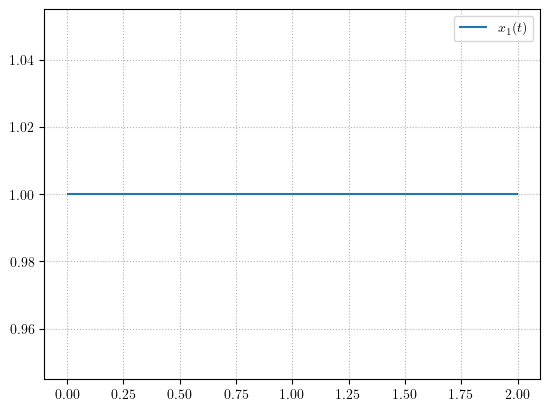

In [40]:
for i in range(0, len_t):
    plt.hlines(y=x_1[0, i], xmin=sum([j for j in x_1[1, 0:i]]), xmax=sum([j for j in x_1[1, 0:i + 1]]),
               label='$x_1(t)$' if i == 0 else None, )
plt.legend()
plt.show()
plt.close()

Define $x_2(t)=1 \cdot \chi_{[0,\infty)}(t)$

In [41]:
# support with infinite measure support
len_t = 1
x_2 = np.zeros(shape=(2, len_t))
x_2[1, 0] = np.inf  #  measure of support
x_2[0, 0] = 1  # value

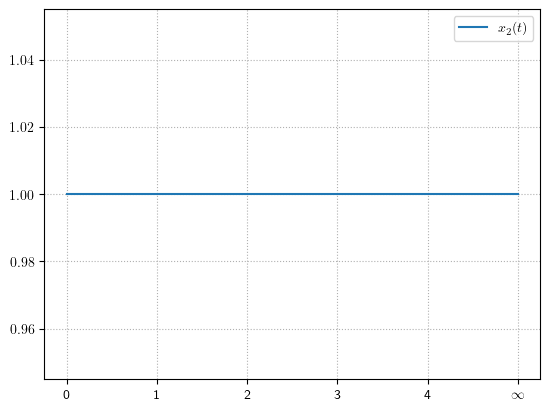

In [42]:
plt.plot([0, 5], [x_2[0, 0], x_2[0, 0]], label='$x_2(t)$')
plt.xticks(np.arange(0, 6, step=1), labels=[str(i) if i < 5 else r"$\infty$" for i in range(6)])

plt.legend()
plt.show()
plt.close()

Define $x_3(t)=1 \cdot \chi_{[0,1)}(t) + \frac{1}{2} \cdot \chi_{[1,3)}(t) +
 \frac{1}{3} \cdot \chi_{[3,6)}(t) + \frac{1}{4} \cdot \chi_{[6,10)}(t) + \frac{1}{5} \cdot \chi_{[10,15)}(t)$ \
or $x_3(t) = \sum_{i=0}^{4} \frac{1}{i+1}\cdot \chi_{A_{i}}(t)$ for disjoint $A_i$ sets with $\mu(A_i)=i+1$.

In [43]:
len_t = 5  # 
x_3 = np.zeros(shape=(2, len_t))
for i in range(len_t):
    x_3[1, i] = i + 1  #  measure of supports
    x_3[0, i] = 1 / (i + 1)  # values

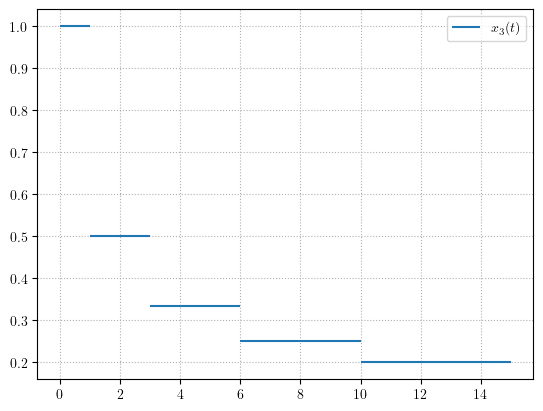

In [44]:
for i in range(0, len(x_3[1, :])):
    plt.hlines(y=x_3[0, i], xmin=sum([j for j in x_3[1, 0:i]]), xmax=sum([j for j in x_3[1, 0:i + 1]]),
               label='$x_3(t)$' if i == 0 else None)
plt.legend()
plt.show()
plt.close()

Define 
\begin{equation*}
x_4(t)=\sum_{i=0}^{999} \left\{ \begin{array}{lll}
                   \sin\left(\frac{2\cdot \pi}{1000}\cdot i\right) & \text{if} & \frac{2\cdot \pi}{1000}\cdot i \leq 3, \\
                   0     & \text{if} & \text{otherwise}
\end{array}
\right\}  \cdot \chi_{A_{i}}(t)
\end{equation*}
for disjoint $A_i$ sets with $\mu(A_i)=\frac{2\cdot \pi}{1000}$.

In [45]:
t_max = 2 * np.pi
len_t = 1000
x_4 = np.zeros(shape=(2, len_t))
x_4[1, :] = t_max / len_t  # measure of supports
for i in range(len_t):
    arg = t_max / len_t * i
    if arg <= 3:
        x_4[0, i] = np.sin(arg)  # values


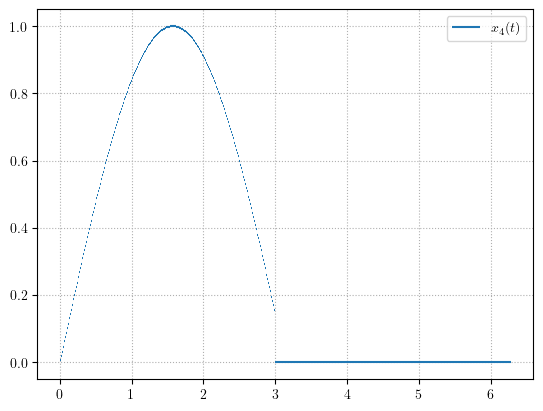

In [46]:
for i in range(0, len_t):
    plt.hlines(y=x_4[0, i], xmin=sum([j for j in x_4[1, 0:i]]), xmax=sum([j for j in x_4[1, 0:i + 1]]),
               label='$x_4(t)$' if i == 0 else None, )
plt.legend()
plt.show()
plt.close()

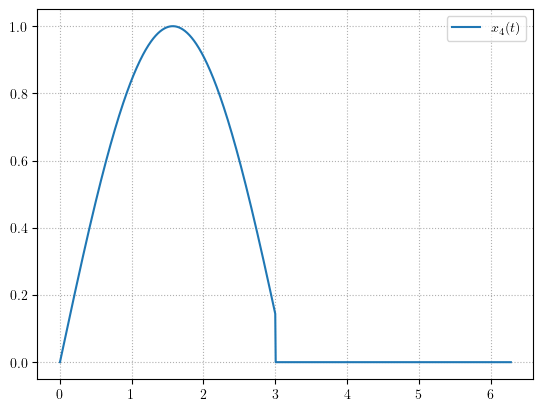

In [47]:
plt.plot(np.linspace(0, t_max, len(x_4[1, :])), x_4[0], label='$x_4(t)$')
plt.legend()
plt.show()
plt.close()

## Orlicz space
Given any Orlicz function $\Phi $ we define on $L_{0}$ the modular $I_{\Phi
} $ by
\begin{equation*}
    I_{\Phi }(x)=\int_{T}\Phi \left( x(t)\right) d\mu \cdot
\end{equation*}
Then the set
\begin{equation*}
    L_{\Phi }=\left\{ x\in L^{0}(T):I_{\Phi }(cx)<\infty  \right\}
\end{equation*}
for some $c>0$ depending on $x$ is called an *Orlicz space.* This space is usually equipped with the *Luxemburg norm*
\begin{equation*}
    \left\Vert x\right\Vert _{\Phi }=\inf \left\{ \varepsilon >0:I_{\Phi }\left(
    \frac{x}{\varepsilon }\right) \leq 1\right\}
\end{equation*}
or with the equivalent one
\begin{equation*}
    \left\Vert x\right\Vert _{\Phi }^{0}=\underset{k>0}{\inf }\frac{1}{k}\left(
    1+I_{\Phi }(kx)\right)
\end{equation*}
called the *Orlicz norm* in the *Amemiya form*.

Let's define another class of norms given by the Amemiya formula -
norms generated by the function
\begin{equation*}
s_p(u)=\left\{ \begin{array}{lll}
                   \left(1+u^p\right)^{\frac{1}{p}} & \text{if} & 1 \leq p < \infty, \\
                   \max\left\{1,u\right\}           & \text{if} & p = \infty%
\end{array}%
\right.
\end{equation*}

## kappa() function

Let $x\in L_{\Phi,p}.$ For any $k \in (0,\infty) $ define function
$\kappa_{p,x}(k)\colon (0,\infty) \rightarrow (0,\infty]$ by formula
\begin{equation*}
    \kappa_{p,x}(k) =  \frac{1}{k}s_p\left(I_{\Phi }(kx)\right).
\end{equation*}

In [48]:
def Orlicz_function(u):
    return np.where(u <= 1, u, np.inf)

In [49]:
osm.kappa(Orlicz_function, x=x_1, k=1, p_norm=1)

np.float64(3.0)

In [50]:
%%timeit
osm.kappa(Orlicz_function, x=x_1, k=1, p_norm=1)

38.9 μs ± 2.55 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## p_Amemiya_norm() 

By the $p-$Amemiya norm of an element $x\in L_0$ we mean the norm defined by the formula
\begin{equation*}
\left\Vert x\right\Vert _{\Phi,p }=\underset{k>0}{\inf }\frac{1}{k}s_p\left(
I_{\Phi }(kx)\right) \quad \text{ for } \quad 1\leq p \leq \infty.
\end{equation*}

It is well known that for $p=1$ the $p-$Amemiya norm coincides with the Orlicz norm and
    for $p=\infty$ with the Luxemburg norm {cite}`HudzikMaligranda`. 
    

In [51]:
osm.p_Amemiya_norm(Orlicz_function, x=x_1, p_norm=1)

np.float64(3.0)

In [52]:
%%timeit
osm.p_Amemiya_norm(Orlicz_function, x=x_1, p_norm=1)

14.1 ms ± 365 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


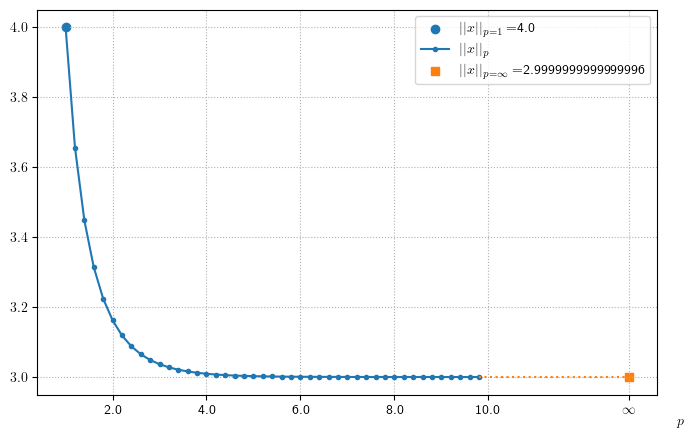

In [74]:
x = np.array([[1], [3]])
osm.plot_p_norms(Orlicz_function,
                 x=x,
                 p_min=1,
                 p_max=10,
                 dp=.2,
                 attach_inf=True,
                 figsize=(8, 5))

## p_Amemiya_norm_with_stars()

Denote $k^*_{p}(x) = \inf{K_{p}(x)}$ and $k^{**}_{p}(x) = \sup{K_{p}(x)}$
(with convention $\inf \emptyset = \infty$).
Then
\begin{equation*}
K_{p}(x) =
\left\{ \begin{array}{lll}
\left[k^*_{p}(x), k^{**}_{p}(x)\right] & \text{if } & k^{**}_{p}(x)<\infty, \\
\left[k^*_{p}(x), \infty \right) & \text{if} & k^*_{p}(x)<\infty \text{ and } k^{**}_{p}(x)=\infty, \\
\emptyset & \text{if } & k^*_{p}(x)=\infty
\end{array}%
\right.
\end{equation*}
and of any $k \in K_{p}(x) $ holds
\begin{equation*}
\left\Vert x\right\Vert _{\Phi,p }=\frac{1}{k}s_p\left(
I_{\Phi }(kx)\right)
\end{equation*}
or (if $K_{p}(x) = \emptyset$ )
\begin{equation*}
\left\Vert x\right\Vert _{\Phi,p }= \lim_{k\rightarrow \infty}\frac{1}{k}s_p\left(
I_{\Phi }(kx)\right)
\end{equation*}

In [55]:
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x_1, p_norm=1)

(np.float64(3.000110995691083),
 np.float64(0.9998890166275929),
 np.float64(0.9998890166275929))

where first result is $||x||$, second is $k_p^*(x)$ and third is $k_p^{**}(x)$

In [56]:
%%timeit
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x_1, p_norm=1)

226 ms ± 1.89 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


example of using p_Amemiya_norm_with_stars() function with additional parameters

In [57]:
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x_1, p_norm=1,
                              k_min=0.9,
                              k_max=1.1,
                              len_domain_k=1000, )
# show_progress=True)

(np.float64(3.000000000000011),
 np.float64(0.999999999999989),
 np.float64(0.999999999999989))

In [58]:
%%timeit
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x_1, p_norm=1, k_min=0.9, k_max=1.1, len_domain_k=1000)

47.9 ms ± 2.39 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## p_Amemiya_norm_with_stars_by_decimal()

Short examples how decimal module works

In [59]:
import decimal as dc  # for function using decimal precision

In [60]:
print(dc.getcontext().prec)
print(dc.Decimal(0.2))
print(dc.Decimal('0.2'))
print(dc.Decimal(1) / 5)
print((dc.Decimal(np.sqrt(2))) ** 2)
print((dc.Decimal(2).sqrt()) ** 2)

dc.getcontext().prec = 50
print(dc.Decimal(0.2))
print(dc.Decimal('0.2'))
print(dc.Decimal(1) / 5)
print((dc.Decimal(np.sqrt(2))) ** 2)
print((dc.Decimal(2).sqrt()) ** 2)

28
0.200000000000000011102230246251565404236316680908203125
0.2
0.2
2.000000000000000273432346306
1.999999999999999999999999999
0.200000000000000011102230246251565404236316680908203125
0.2
0.2
2.0000000000000002734323463064769280688491650795723
1.9999999999999999999999999999999999999999999999999


Orlicz function and x must be prepared to decimal form

In [61]:
def Orlicz_function(u):
    return np.where(u <= 1, u, dc.Decimal(np.inf))


len_t = 1
x_5 = np.zeros(shape=(2, len_t), dtype=np.dtype('object'))
x_5[1, 0] = dc.Decimal(2)  #  measure of support
x_5[0, 0] = dc.Decimal(1)  # value
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x_5, p_norm=1)

(Decimal('3.1110988766779245797415719566910102134319832100514'),
 Decimal('0.90000991'),
 Decimal('0.90000991'))

In [62]:
%%timeit
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x_5, p_norm=1)

71.9 ms ± 20.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


example of using p_Amemiya_norm_with_stars_by_decimal() function with additional parameters

In [63]:
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x_5, p_norm=dc.Decimal(1),
                                         k_min=dc.Decimal('0.9'),
                                         k_max=dc.Decimal('1.1'),
                                         len_domain_k=1000, )
# show_progress=True)

(Decimal('3.0000'), Decimal('1.0000'), Decimal('1.0000'))

In [64]:
%%timeit
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x_5, p_norm=dc.Decimal(1),
                                         k_min=dc.Decimal('0.9'),
                                         k_max=dc.Decimal('1.1'),
                                         len_domain_k=1000
                                         )

59.2 ms ± 3.34 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In the next example there is false $k_p^{*}(x)$ less than $k_p^{**}(x)$

In [65]:
def Orlicz_function(u):
    return np.where(u <= 1, u, 2 * u - 1)


x = np.array([[1], [3]])


In [66]:
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x, p_norm=20)

(np.float64(3.0000000000430616),
 np.float64(0.64823266269593),
 np.float64(0.9999516967001615))

In [67]:
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x, p_norm=dc.Decimal(10))

(Decimal('3.0000145688845555222000227125563249652936039015189'),
 Decimal('0.90000991'),
 Decimal('0.90000991'))

For better accuracy we may reduce domain by

In [68]:
osm.p_Amemiya_norm_with_stars(Orlicz_function, x=x, p_norm=20,
                              k_min=0.45,
                              k_max=1.05)

(np.float64(3.0000000000433653),
 np.float64(0.6671999999999962),
 np.float64(0.9995999999999903))

In [69]:
osm.p_Amemiya_norm_with_stars_by_decimal(Orlicz_function, x=x, p_norm=dc.Decimal(10),
                                         k_min=dc.Decimal(45) / 100,
                                         k_max=dc.Decimal(105) / 100)

(Decimal('3.0000051008541999106151967575520682494068505040605'),
 Decimal('0.9996'),
 Decimal('0.9996'))